# Exploration of data

In [2]:
!pip install pipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# imports
import pandas as pd
import pipe
import seaborn as sns

In [10]:
file = '/content/findex_SubSahAfrica.csv'
df = pd.read_csv(file, index_col=0)
print(f'There are {df.shape[0]} entries and {df.shape[1]} features')
df.head()

There are 35000 entries and 105 features


,economy,economycode,regionwb,pop_adult,wpid_random,wgt,female,age,educ,inc_q,...,receive_wages,receive_transfers,receive_pension,receive_agriculture,pay_utilities,remittances,pay_onlne,pay_onlne_mobintbuy,pay_cash,pay_cash_mobintbuy
12138,Benin,BEN,Sub-Saharan Africa (excluding high income),6211794.0,143101339,1.909609,1,60.0,1.0,1,...,4,4,4,4.0,4,5.0,0.0,NaN,0.0,NaN
12139,Benin,BEN,Sub-Saharan Africa (excluding high income),6211794.0,123998301,2.075761,1,45.0,1.0,1,...,4,4,4,4.0,3,1.0,0.0,NaN,0.0,NaN
12140,Benin,BEN,Sub-Saharan Africa (excluding high income),6211794.0,157155643,0.785666,1,27.0,3.0,4,...,4,4,4,4.0,4,2.0,1.0,1.0,0.0,0.0
12141,Benin,BEN,Sub-Saharan Africa (excluding high income),6211794.0,155618899,1.450568,2,24.0,1.0,2,...,4,4,4,4.0,3,5.0,0.0,NaN,0.0,NaN
12142,Benin,BEN,Sub-Saharan Africa (excluding high income),6211794.0,143861320,0.461588,1,22.0,1.0,5,...,4,4,4,4.0,4,5.0,0.0,NaN,0.0,NaN


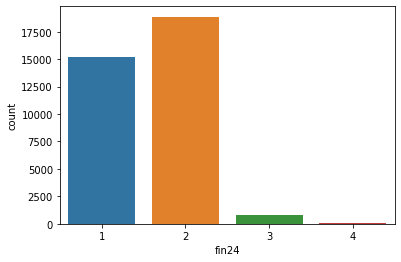

In [12]:
# select vars of interest
df2 = df[['female', 'age', 'emp_in', 'account_fin', 'fin24', 'fin25']]
df2.fin24.value_counts()

# barplot of access to emergency funds
sns.countplot(x = 'fin24', data = df2)

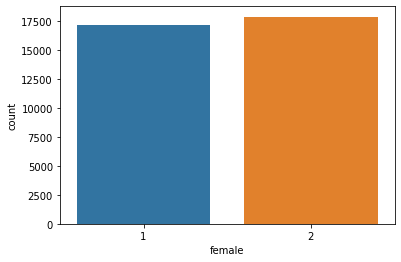

In [13]:
# barplot female versus not
sns.countplot(x = 'female', data = df2)

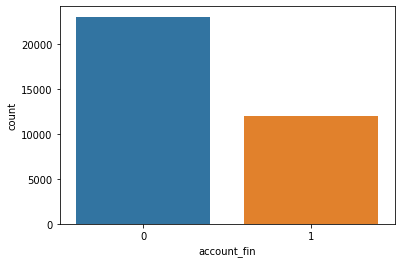

In [27]:
# barplot of number of people who have a bank account
sns.countplot(x = 'account_fin', data = df2)

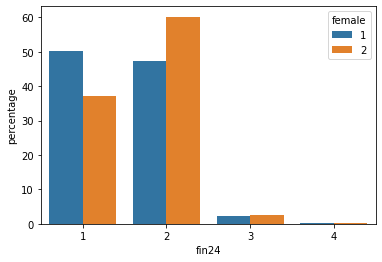

In [25]:
# barplot of possibility of coming up with emergency funds by gender
# 1 = female, 2 = not female
# 1 = yes have access, 2 = no, 3 = don't know, 4 = refuse
gender_fin_counts = (df2.groupby(['female'])['fin24']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
)
sns.barplot(x = "fin24", y = "percentage", hue="female", data = gender_fin_counts)

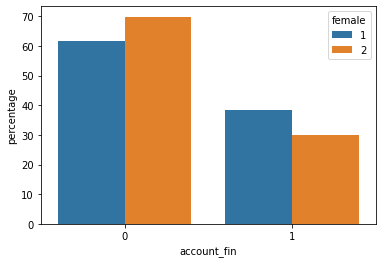

In [28]:
gender_acc_counts = (df2.groupby(['female'])['account_fin']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
)
sns.barplot(x = "account_fin", y = "percentage", hue="female", data = gender_acc_counts)

Interesting that a higher percentage of females have a bank account as compared to other genders, and also a higher percentage of females have access to emergency funds. 

In [53]:
# trying to make barplot of reasons for no bank account but not working
df_long = df[['fin11a', "fin11b", "fin11c", "fin11d", "fin11e", "fin11f", "fin11g", "fin11h"]].stack().reset_index()
df_long.head()
# df_long.columns()
# sns.countplot(x = ['level_1'], data = df_long)

,level_0,level_1,0
0,12138,fin11a,1.0
1,12138,fin11b,2.0
2,12138,fin11c,1.0
3,12138,fin11d,2.0
4,12138,fin11e,2.0
